# Strava Fitness Data Analytics Case Study

## Overview

### **Project Objective**

Strava is a leading social fitness application that empowers millions of users to track their workouts, analyze performance, and connect with a global community of athletes. In this project, we analyze user activity data from Strava to uncover actionable insights that can help improve user engagement, retention, and the overall performance of the Strava app.

The objective is to understand how users interact with Strava, what drives engagement and loyalty, and where there are opportunities to optimize the user experience.

### **Why Are We Doing This?**


- **Business Motivation:**  
  As competition in the fitness app market intensifies, it is crucial for Strava to leverage user data to guide product development and marketing strategy. By analyzing activity logs, engagement patterns, and health metrics, Strava can make informed decisions to attract new users, retain existing ones, and deliver a world-class fitness tracking experience.


- **Analytics Motivation:**  
  This analysis will help answer questions such as:
  - What keeps Strava users coming back?
  - What features or activity patterns are associated with higher engagement and retention?
  - When are users most active? Are there peak days/times?
  - Are there distinct user segments based on activity or engagement patterns?
  - How do user demographics relate to activity levels?

### **Approach & Analysis Plan**

1. **Data Cleaning & Preparation**  
   Load all available datasets (daily, hourly, minute, and heart rate logs). Standardize formats, handle missing values, and prepare the data for analysis.

2. **Exploratory Data Analysis (EDA)**
   - **User Activity Trends:** Analyze distributions and trends for steps, calories, active minutes, and workout intensity at daily, hourly, and minute levels.
   - **Peak Periods:** Identify when users are most/least active (by hour, day, week).
   - **Retention Analysis:** Investigate how often users return and how long they stay active.
   - **Correlation Analysis:** Explore relationships between activity, sleep, calories burned, and other health metrics.
   - **User Segmentation:** Cluster users based on behavior to discover key personas (e.g., daily runners, casual walkers, power users).
   - **Geographic/Route Patterns:** (If available) Study popular routes or locations.

3. **Advanced Analytics**
   - **Time Series & Seasonality:** Detect recurring activity trends over time.
   - **Predictive Modeling:** Optionally, build simple models to forecast future engagement or segment users.

4. **Visualization**
   - Use charts (Matplotlib, Seaborn, Power BI) to communicate insights.
   - Build dashboards for key metrics, activity heatmaps, and user segments.

5. **Key Findings & Recommendations**
   - Summarize actionable insights and suggest strategies for enhancing user engagement, retention, and growth on Strava.


### **Key Business Questions**

- What does a typical Strava user's activity look like?
- Which times and days see the most engagement?
- What features or behaviors drive higher retention?
- Are there distinct user segments that could be targeted differently?
- What recommendations can improve user experience and business KPIs?

## Getting Started: Data Analysis Process

With our project objectives and business context clearly established, we now move into the data analysis phase of the Strava Fitness Data Analytics Case Study.

In this section, we will:
- Import all relevant datasets provided by Strava fitness tracker logs (daily, hourly, minute, and heart rate data).
- Inspect and understand the structure and quality of the data.
- Perform essential cleaning and transformation steps to prepare for meaningful analysis.

By ensuring the data is clean and well-structured from the outset, we lay a strong foundation for all subsequent exploratory analysis, statistical modeling, and visualization. This approach allows us to extract trustworthy insights that can drive better business decisions for Strava.

Let’s begin by importing the necessary libraries and loading the datasets.

In [ ]:
# Initial Setup: Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Display settings for notebook
pd.set_option('display.max_columns', 50)
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Load All Available Datasets

# Daily-level data
activity = pd.read_csv('dailyActivity_merged.csv')
steps = pd.read_csv('dailySteps_merged.csv')
intensities = pd.read_csv('dailyIntensities_merged.csv')
calories = pd.read_csv('dailyCalories_merged.csv')
sleep = pd.read_csv('sleepDay_merged.csv')
weight = pd.read_csv('weightLogInfo_merged.csv')

# Hourly-level data
hourly_steps = pd.read_csv('hourlySteps_merged.csv')
hourly_intensities = pd.read_csv('hourlyIntensities_merged.csv')
hourly_calories = pd.read_csv('hourlyCalories_merged.csv')

# Minute-level data
minute_steps_wide = pd.read_csv('minuteStepsWide_merged.csv')
minute_steps_narrow = pd.read_csv('minuteStepsNarrow_merged.csv')
minute_intensities_wide = pd.read_csv('minuteIntensitiesWide_merged.csv')
minute_intensities_narrow = pd.read_csv('minuteIntensitiesNarrow_merged.csv')
minute_calories_wide = pd.read_csv('minuteCaloriesWide_merged.csv')
minute_calories_narrow = pd.read_csv('minuteCaloriesNarrow_merged.csv')
minute_METs_narrow = pd.read_csv('minuteMETsNarrow_merged.csv')
minute_sleep = pd.read_csv('minuteSleep_merged.csv')

# Heart rate data
heartrate = pd.read_csv('heartrate_seconds_merged.csv')

In [ ]:
# Preview All Datasets: Shape and Head

datasets = {
    'Activity (Daily)': activity,
    'Steps (Daily)': steps,
    'Intensities (Daily)': intensities,
    'Calories (Daily)': calories,
    'Sleep (Daily)': sleep,
    'Weight': weight,
    'Hourly Steps': hourly_steps,
    'Hourly Intensities': hourly_intensities,
    'Hourly Calories': hourly_calories,
    'Minute Steps Wide': minute_steps_wide,
    'Minute Steps Narrow': minute_steps_narrow,
    'Minute Intensities Wide': minute_intensities_wide,
    'Minute Intensities Narrow': minute_intensities_narrow,
    'Minute Calories Wide': minute_calories_wide,
    'Minute Calories Narrow': minute_calories_narrow,
    'Minute METs Narrow': minute_METs_narrow,
    'Minute Sleep': minute_sleep,
    'Heart Rate': heartrate,
}

for name, df in datasets.items():
    print(f"\n{name} — shape: {df.shape}")
    display(df.head(2))


Activity (Daily) — shape: (940, 15)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797



Steps (Daily) — shape: (940, 3)


,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735



Intensities (Daily) — shape: (940, 10)


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57



Calories (Daily) — shape: (940, 3)


,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797



Sleep (Daily) — shape: (413, 5)


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407



Weight — shape: (67, 8)


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.65,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.65,True,1462319999000



Hourly Steps — shape: (22099, 3)


,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160



Hourly Intensities — shape: (22099, 4)


,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333



Hourly Calories — shape: (22099, 3)


,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61



Minute Steps Wide — shape: (21645, 62)


,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,Steps08,Steps09,Steps10,Steps11,Steps12,Steps13,Steps14,Steps15,Steps16,Steps17,Steps18,Steps19,Steps20,Steps21,Steps22,...,Steps35,Steps36,Steps37,Steps38,Steps39,Steps40,Steps41,Steps42,Steps43,Steps44,Steps45,Steps46,Steps47,Steps48,Steps49,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
0,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,8,0,20,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Minute Steps Narrow — shape: (1325580, 3)


,Id,ActivityMinute,Steps
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0



Minute Intensities Wide — shape: (21645, 62)


,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,Intensity08,Intensity09,Intensity10,Intensity11,Intensity12,Intensity13,Intensity14,Intensity15,Intensity16,Intensity17,Intensity18,Intensity19,Intensity20,Intensity21,Intensity22,...,Intensity35,Intensity36,Intensity37,Intensity38,Intensity39,Intensity40,Intensity41,Intensity42,Intensity43,Intensity44,Intensity45,Intensity46,Intensity47,Intensity48,Intensity49,Intensity50,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59
0,1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Minute Intensities Narrow — shape: (1325580, 3)


,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0



Minute Calories Wide — shape: (21645, 62)


,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,Calories08,Calories09,Calories10,Calories11,Calories12,Calories13,Calories14,Calories15,Calories16,Calories17,Calories18,Calories19,Calories20,Calories21,Calories22,...,Calories35,Calories36,Calories37,Calories38,Calories39,Calories40,Calories41,Calories42,Calories43,Calories44,Calories45,Calories46,Calories47,Calories48,Calories49,Calories50,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59
0,1503960366,4/13/2016 12:00:00 AM,1.8876,2.2022,0.9438,0.9438,0.9438,2.0449,0.9438,2.2022,0.9438,0.7865,0.9438,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.7865,0.7865,0.7865,1.8876,0.9438,0.9438,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.9438,2.0449,2.0449,0.9438,2.3595,1.8876,0.9438,0.9438,0.9438,0.9438
1,1503960366,4/13/2016 1:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.9438,0.7865,0.9438,0.7865,0.9438,0.7865,0.9438,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865



Minute Calories Narrow — shape: (1325580, 3)


,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.7865
1,1503960366,4/12/2016 12:01:00 AM,0.7865



Minute METs Narrow — shape: (1325580, 3)


,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10



Minute Sleep — shape: (188521, 4)


,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589



Heart Rate — shape: (2483658, 3)


,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102


from matplotlib import pyplot as plt
_df_0['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Id'}, axis=1)
              .sort_values('Id', ascending=True))
  xs = counted['Id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Time'}, axis=1)
              .sort_values('Time', ascending=True))
  xs = counted['Time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Value']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Value'}, axis=1)
              .sort_values('Value', ascending=True))
  xs = counted['Value']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Value', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Value')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Value'].plot(kind='line', figsize=(8, 4), title='Value')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['Time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='Value', y='Time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Data Types and Null Values Overview

for name, df in datasets.items():
    print(f"\n{name} - Info:")
    display(df.info())
    print("Missing values:\n", df.isnull().sum())
    print('-' * 50)


Activity (Daily) - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null 

None

Missing values:
 Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64
--------------------------------------------------

Steps (Daily) - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


None

Missing values:
 Id             0
ActivityDay    0
StepTotal      0
dtype: int64
--------------------------------------------------

Intensities (Daily) - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


None

Missing values:
 Id                          0
ActivityDay                 0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
dtype: int64
--------------------------------------------------

Calories (Daily) - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


None

Missing values:
 Id             0
ActivityDay    0
Calories       0
dtype: int64
--------------------------------------------------

Sleep (Daily) - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


None

Missing values:
 Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64
--------------------------------------------------

Weight - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


None

Missing values:
 Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64
--------------------------------------------------

Hourly Steps - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


None

Missing values:
 Id              0
ActivityHour    0
StepTotal       0
dtype: int64
--------------------------------------------------

Hourly Intensities - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


None

Missing values:
 Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64
--------------------------------------------------

Hourly Calories - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


None

Missing values:
 Id              0
ActivityHour    0
Calories        0
dtype: int64
--------------------------------------------------

Minute Steps Wide - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21645 entries, 0 to 21644
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            21645 non-null  int64 
 1   ActivityHour  21645 non-null  object
 2   Steps00       21645 non-null  int64 
 3   Steps01       21645 non-null  int64 
 4   Steps02       21645 non-null  int64 
 5   Steps03       21645 non-null  int64 
 6   Steps04       21645 non-null  int64 
 7   Steps05       21645 non-null  int64 
 8   Steps06       21645 non-null  int64 
 9   Steps07       21645 non-null  int64 
 10  Steps08       21645 non-null  int64 
 11  Steps09       21645 non-null  int64 
 12  Steps10       21645 non-null  int64 
 13  Steps11       21645 non-null  int64 
 14  Steps12       21645 non-null  int64 
 15  Steps13   

None

Missing values:
 Id              0
ActivityHour    0
Steps00         0
Steps01         0
Steps02         0
               ..
Steps55         0
Steps56         0
Steps57         0
Steps58         0
Steps59         0
Length: 62, dtype: int64
--------------------------------------------------

Minute Steps Narrow - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   Steps           1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


None

Missing values:
 Id                0
ActivityMinute    0
Steps             0
dtype: int64
--------------------------------------------------

Minute Intensities Wide - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21645 entries, 0 to 21644
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            21645 non-null  int64 
 1   ActivityHour  21645 non-null  object
 2   Intensity00   21645 non-null  int64 
 3   Intensity01   21645 non-null  int64 
 4   Intensity02   21645 non-null  int64 
 5   Intensity03   21645 non-null  int64 
 6   Intensity04   21645 non-null  int64 
 7   Intensity05   21645 non-null  int64 
 8   Intensity06   21645 non-null  int64 
 9   Intensity07   21645 non-null  int64 
 10  Intensity08   21645 non-null  int64 
 11  Intensity09   21645 non-null  int64 
 12  Intensity10   21645 non-null  int64 
 13  Intensity11   21645 non-null  int64 
 14  Intensity12   21645 non-null  int64 
 15

None

Missing values:
 Id              0
ActivityHour    0
Intensity00     0
Intensity01     0
Intensity02     0
               ..
Intensity55     0
Intensity56     0
Intensity57     0
Intensity58     0
Intensity59     0
Length: 62, dtype: int64
--------------------------------------------------

Minute Intensities Narrow - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   Intensity       1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


None

Missing values:
 Id                0
ActivityMinute    0
Intensity         0
dtype: int64
--------------------------------------------------

Minute Calories Wide - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21645 entries, 0 to 21644
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            21645 non-null  int64  
 1   ActivityHour  21645 non-null  object 
 2   Calories00    21645 non-null  float64
 3   Calories01    21645 non-null  float64
 4   Calories02    21645 non-null  float64
 5   Calories03    21645 non-null  float64
 6   Calories04    21645 non-null  float64
 7   Calories05    21645 non-null  float64
 8   Calories06    21645 non-null  float64
 9   Calories07    21645 non-null  float64
 10  Calories08    21645 non-null  float64
 11  Calories09    21645 non-null  float64
 12  Calories10    21645 non-null  float64
 13  Calories11    21645 non-null  float64
 14  Calories12    21645 non-nul

None

Missing values:
 Id              0
ActivityHour    0
Calories00      0
Calories01      0
Calories02      0
               ..
Calories55      0
Calories56      0
Calories57      0
Calories58      0
Calories59      0
Length: 62, dtype: int64
--------------------------------------------------

Minute Calories Narrow - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Id              1325580 non-null  int64  
 1   ActivityMinute  1325580 non-null  object 
 2   Calories        1325580 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.3+ MB


None

Missing values:
 Id                0
ActivityMinute    0
Calories          0
dtype: int64
--------------------------------------------------

Minute METs Narrow - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   METs            1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


None

Missing values:
 Id                0
ActivityMinute    0
METs              0
dtype: int64
--------------------------------------------------

Minute Sleep - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188521 entries, 0 to 188520
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      188521 non-null  int64 
 1   date    188521 non-null  object
 2   value   188521 non-null  int64 
 3   logId   188521 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.8+ MB


None

Missing values:
 Id       0
date     0
value    0
logId    0
dtype: int64
--------------------------------------------------

Heart Rate - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


None

Missing values:
 Id       0
Time     0
Value    0
dtype: int64
--------------------------------------------------


## Standardizing Date and Time Columns


Before performing any time-based analysis, it is crucial to ensure that all relevant date and time columns across our datasets are consistently formatted as pandas datetime objects.  
This allows us to:
- Easily filter, group, and resample data by day, week, hour, etc.
- Merge/join datasets on timestamps if needed
- Create time-based features (weekday, hour, etc.) for deeper insights

Below, we standardize all known date and time columns in our datasets.

In [ ]:
# Helper function to parse multiple possible date/time columns
def standardize_datetime_columns(df, col_list):
    for col in col_list:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

# Apply date/time standardization to all datasets

# Daily-level
activity = standardize_datetime_columns(activity, ['ActivityDate'])
steps = standardize_datetime_columns(steps, ['ActivityDay'])
intensities = standardize_datetime_columns(intensities, ['ActivityDay'])
calories = standardize_datetime_columns(calories, ['ActivityDay'])
sleep = standardize_datetime_columns(sleep, ['SleepDay'])
weight = standardize_datetime_columns(weight, ['Date'])

# Hourly-level
hourly_steps = standardize_datetime_columns(hourly_steps, ['ActivityHour'])
hourly_intensities = standardize_datetime_columns(hourly_intensities, ['ActivityHour'])
hourly_calories = standardize_datetime_columns(hourly_calories, ['ActivityHour'])

# Minute-level (wide and narrow)
minute_steps_wide = standardize_datetime_columns(minute_steps_wide, ['ActivityMinute'])
minute_steps_narrow = standardize_datetime_columns(minute_steps_narrow, ['ActivityMinute'])
minute_intensities_wide = standardize_datetime_columns(minute_intensities_wide, ['ActivityMinute'])
minute_intensities_narrow = standardize_datetime_columns(minute_intensities_narrow, ['ActivityMinute'])
minute_calories_wide = standardize_datetime_columns(minute_calories_wide, ['ActivityMinute'])
minute_calories_narrow = standardize_datetime_columns(minute_calories_narrow, ['ActivityMinute'])
minute_METs_narrow = standardize_datetime_columns(minute_METs_narrow, ['ActivityMinute'])
minute_sleep = standardize_datetime_columns(minute_sleep, ['SleepMinute'])

# Heart rate data
heartrate = standardize_datetime_columns(heartrate, ['Time'])

print("All relevant date and time columns have been standardized.")

<ipython-input-6-37bdae525248>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-6-37bdae525248>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-6-37bdae525248>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-6-37bdae525248>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expe

All relevant date and time columns have been standardized.


In [ ]:
# Robust cleaning function
def dropna_if_exists(df, subset):
    """Drop rows with NA in columns listed in subset if those columns exist in df."""
    actual_cols = [col for col in subset if col in df.columns]
    if actual_cols:
        return df.dropna(subset=actual_cols)
    return df

# Remove duplicates for all datasets
for name, df in datasets.items():
    before = df.shape[0]
    df.drop_duplicates(inplace=True)
    after = df.shape[0]
    print(f"{name}: Removed {before-after} duplicates.")

# Drop NA for key columns (edit/add as per your data)
activity = dropna_if_exists(activity, ['Id'])
sleep = dropna_if_exists(sleep, ['Id'])
weight = dropna_if_exists(weight, ['Id', 'WeightKg'])
heartrate = dropna_if_exists(heartrate, ['Id', 'Value'])
minute_steps_narrow = dropna_if_exists(minute_steps_narrow, ['Id', 'Value'])
minute_steps_wide = dropna_if_exists(minute_steps_wide, ['Id'])
minute_intensities_narrow = dropna_if_exists(minute_intensities_narrow, ['Id', 'Value'])
minute_intensities_wide = dropna_if_exists(minute_intensities_wide, ['Id'])
minute_calories_narrow = dropna_if_exists(minute_calories_narrow, ['Id', 'Value'])
minute_calories_wide = dropna_if_exists(minute_calories_wide, ['Id'])
minute_METs_narrow = dropna_if_exists(minute_METs_narrow, ['Id', 'Value'])
minute_sleep = dropna_if_exists(minute_sleep, ['Id', 'Value'])
steps = dropna_if_exists(steps, ['Id', 'StepTotal']) if 'StepTotal' in steps.columns else dropna_if_exists(steps, ['Id'])
intensities = dropna_if_exists(intensities, ['Id'])
calories = dropna_if_exists(calories, ['Id'])
hourly_steps = dropna_if_exists(hourly_steps, ['Id', 'StepTotal']) if 'StepTotal' in hourly_steps.columns else dropna_if_exists(hourly_steps, ['Id'])
hourly_intensities = dropna_if_exists(hourly_intensities, ['Id'])
hourly_calories = dropna_if_exists(hourly_calories, ['Id'])

print("Basic cleaning completed for all datasets.")

Activity (Daily): Removed 0 duplicates.
Steps (Daily): Removed 0 duplicates.
Intensities (Daily): Removed 0 duplicates.
Calories (Daily): Removed 0 duplicates.
Sleep (Daily): Removed 0 duplicates.
Weight: Removed 0 duplicates.
Hourly Steps: Removed 0 duplicates.
Hourly Intensities: Removed 0 duplicates.
Hourly Calories: Removed 0 duplicates.
Minute Steps Wide: Removed 0 duplicates.
Minute Steps Narrow: Removed 0 duplicates.
Minute Intensities Wide: Removed 0 duplicates.
Minute Intensities Narrow: Removed 0 duplicates.
Minute Calories Wide: Removed 0 duplicates.
Minute Calories Narrow: Removed 0 duplicates.
Minute METs Narrow: Removed 0 duplicates.
Minute Sleep: Removed 0 duplicates.
Heart Rate: Removed 0 duplicates.
Basic cleaning completed for all datasets.


In [ ]:
#Unique User ID Check
# List of your main dataframes for ID checks
dfs_for_id = [activity, steps, intensities, calories, sleep, weight,
              hourly_steps, hourly_intensities, hourly_calories,
              minute_steps_narrow, minute_steps_wide,
              minute_intensities_narrow, minute_intensities_wide,
              minute_calories_narrow, minute_calories_wide,
              minute_METs_narrow, minute_sleep, heartrate]

for df, name in zip(dfs_for_id, datasets.keys()):
    if 'Id' in df.columns:
        print(f"\n{name} — Checking user ID column:")
        print("Nulls:", df['Id'].isnull().sum())
        print("Unique IDs:", df['Id'].nunique())
        print("Sample IDs:", df['Id'].astype(str).unique()[:5])
        print("ID dtype:", df['Id'].dtype)


Activity (Daily) — Checking user ID column:
Nulls: 0
Unique IDs: 33
Sample IDs: ['1503960366' '1624580081' '1644430081' '1844505072' '1927972279']
ID dtype: int64

Steps (Daily) — Checking user ID column:
Nulls: 0
Unique IDs: 33
Sample IDs: ['1503960366' '1624580081' '1644430081' '1844505072' '1927972279']
ID dtype: int64

Intensities (Daily) — Checking user ID column:
Nulls: 0
Unique IDs: 33
Sample IDs: ['1503960366' '1624580081' '1644430081' '1844505072' '1927972279']
ID dtype: int64

Calories (Daily) — Checking user ID column:
Nulls: 0
Unique IDs: 33
Sample IDs: ['1503960366' '1624580081' '1644430081' '1844505072' '1927972279']
ID dtype: int64

Sleep (Daily) — Checking user ID column:
Nulls: 0
Unique IDs: 24
Sample IDs: ['1503960366' '1644430081' '1844505072' '1927972279' '2026352035']
ID dtype: int64

Weight — Checking user ID column:
Nulls: 0
Unique IDs: 8
Sample IDs: ['1503960366' '1927972279' '2873212765' '4319703577' '4558609924']
ID dtype: int64

Hourly Steps — Checking user 

In [ ]:
# Outlier / Sanity Checks
# Activity dataset sanity checks
print("\nNegative step counts in dailyActivity:", (activity['TotalSteps'] < 0).sum() if 'TotalSteps' in activity.columns else "N/A")
print("Negative calories in dailyActivity:", (activity['Calories'] < 0).sum() if 'Calories' in activity.columns else "N/A")
print("Negative minutes asleep in sleepDay:", (sleep['TotalMinutesAsleep'] < 0).sum() if 'TotalMinutesAsleep' in sleep.columns else "N/A")

# Remove impossible values
if 'TotalSteps' in activity.columns:
    activity = activity[activity['TotalSteps'] >= 0]
if 'Calories' in activity.columns:
    activity = activity[activity['Calories'] >= 0]
if 'TotalMinutesAsleep' in sleep.columns:
    sleep = sleep[sleep['TotalMinutesAsleep'] >= 0]


Negative step counts in dailyActivity: 0
Negative calories in dailyActivity: 0
Negative minutes asleep in sleepDay: 0


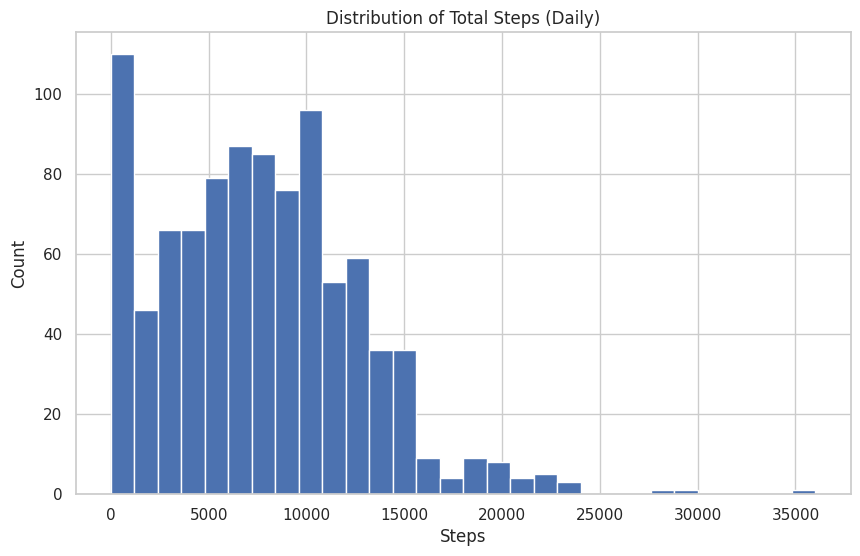

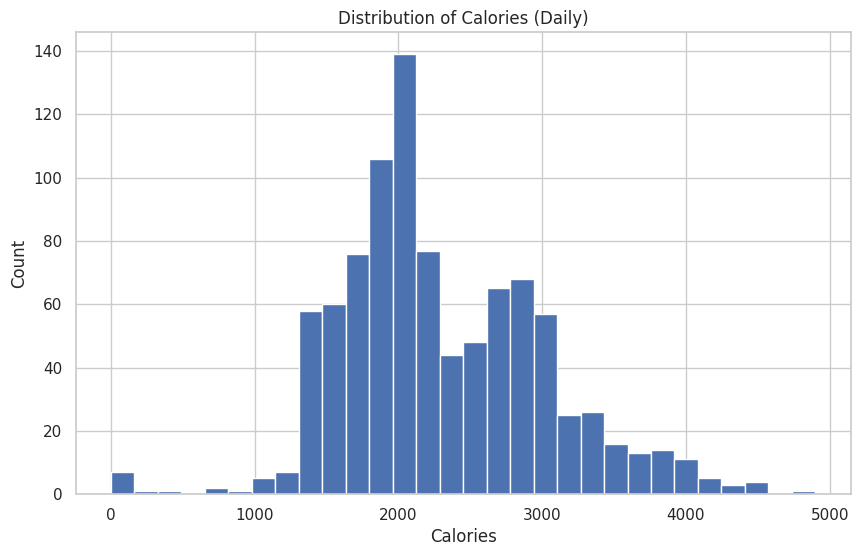

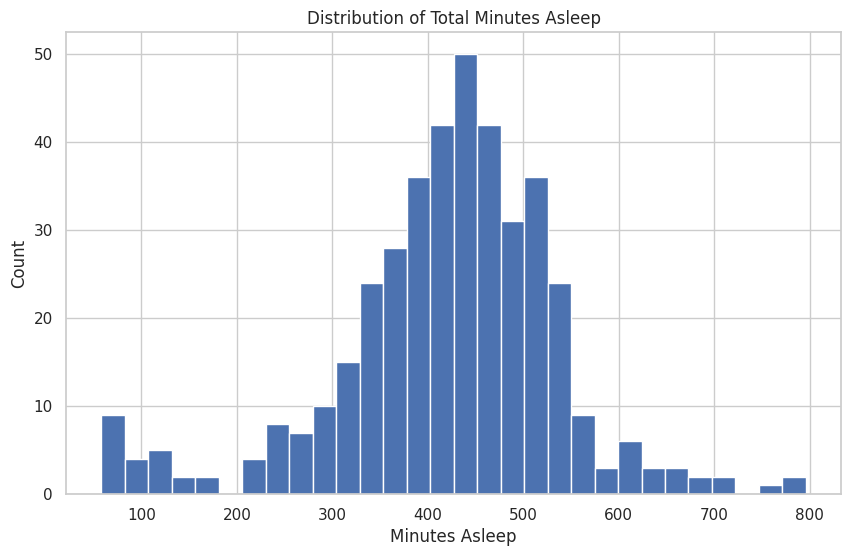

In [ ]:
# Histograms for Visual Sanity Check
if 'TotalSteps' in activity.columns:
    plt.hist(activity['TotalSteps'], bins=30)
    plt.title('Distribution of Total Steps (Daily)')
    plt.xlabel('Steps')
    plt.ylabel('Count')
    plt.show()

if 'Calories' in activity.columns:
    plt.hist(activity['Calories'], bins=30)
    plt.title('Distribution of Calories (Daily)')
    plt.xlabel('Calories')
    plt.ylabel('Count')
    plt.show()

if 'TotalMinutesAsleep' in sleep.columns:
    plt.hist(sleep['TotalMinutesAsleep'], bins=30)
    plt.title('Distribution of Total Minutes Asleep')
    plt.xlabel('Minutes Asleep')
    plt.ylabel('Count')
    plt.show()

In [ ]:
# Cap outliers at 99th percentile (example for steps)
if 'TotalSteps' in activity.columns:
    step_cap = activity['TotalSteps'].quantile(0.99)
    activity = activity[activity['TotalSteps'] <= step_cap]

## Exploratory Data Analysis (EDA)



We begin our EDA by understanding the structure and summary statistics of the core datasets. This helps us get a sense of user behavior, activity patterns, and data quality before diving deeper.

In [ ]:
# Summary statistics for main daily datasets

# Activity
if 'TotalSteps' in activity.columns:
    print("Activity Data Summary:")
    display(activity.describe())

# Sleep
if 'TotalMinutesAsleep' in sleep.columns:
    print("\nSleep Data Summary:")
    display(sleep.describe())

# Calories
if 'Calories' in activity.columns:
    print("\nCalories Summary:")
    display(activity['Calories'].describe())

# Weight
if 'WeightKg' in weight.columns:
    print("\nWeight Data Summary:")
    display(weight['WeightKg'].describe())

Activity Data Summary:


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.300000e+02,930,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,4.834464e+09,2016-04-26 07:07:21.290322432,7448.756989,5.326688,5.312183,0.109334,1.372516,0.556548,3.318387,0.001602,20.159140,13.388172,192.164516,991.629032,2288.835484
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3761.000000,2.600000,2.600000,0.000000,0.000000,0.000000,1.922500,0.000000,0.000000,0.000000,126.250000,729.000000,1826.250000
50%,4.445115e+09,2016-04-26 00:00:00,7362.000000,5.195000,5.195000,0.000000,0.200000,0.235000,3.355000,0.000000,3.000000,6.000000,197.000000,1059.000000,2125.500000
75%,6.962181e+09,2016-05-04 00:00:00,10669.000000,7.610000,7.580000,0.000000,1.992500,0.790000,4.765000,0.000000,30.750000,19.000000,263.750000,1233.000000,2781.750000
max,8.877689e+09,2016-05-12 00:00:00,21727.000000,19.559999,19.559999,4.942142,13.260000,6.480000,10.570000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,2.412799e+09,NaN,4753.098759,3.587752,3.567919,0.623122,2.305053,0.868563,2.024445,0.007359,31.379795,19.866532,109.338297,302.261553,704.992971



Sleep Data Summary:


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.100000e+02,410,410.000000,410.000000,410.000000
mean,4.994963e+09,2016-04-26 11:38:55.609756160,1.119512,419.173171,458.482927
min,1.503960e+09,2016-04-12 00:00:00,1.000000,58.000000,61.000000
25%,3.977334e+09,2016-04-19 00:00:00,1.000000,361.000000,403.750000
50%,4.702922e+09,2016-04-27 00:00:00,1.000000,432.500000,463.000000
75%,6.962181e+09,2016-05-04 00:00:00,1.000000,490.000000,526.000000
max,8.792010e+09,2016-05-12 00:00:00,3.000000,796.000000,961.000000
std,2.060863e+09,NaN,0.346636,118.635918,127.455140



Calories Summary:


,Calories
count,930.000000
mean,2288.835484
std,704.992971
min,0.000000
25%,1826.250000
50%,2125.500000
75%,2781.750000
max,4900.000000



Weight Data Summary:


,WeightKg
count,67.000000
mean,72.035821
std,13.923206
min,52.599998
25%,61.400002
50%,62.500000
75%,85.049999
max,133.500000


### Distributions of Key Metrics


Visualizing the distribution of steps, calories burned, and sleep minutes provides insight into the typical user experience and highlights potential outliers or interesting patterns.

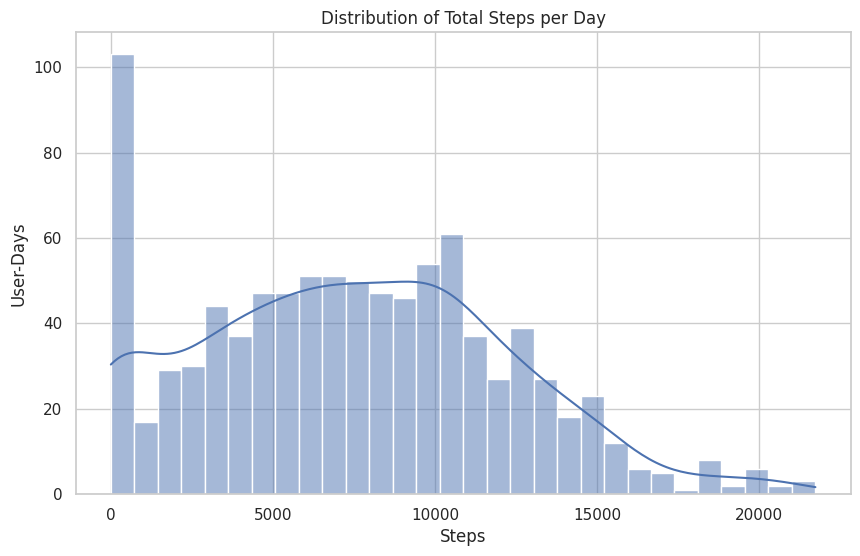

In [ ]:
# Steps Distribution
if 'TotalSteps' in activity.columns:
    plt.figure()
    sns.histplot(activity['TotalSteps'], bins=30, kde=True)
    plt.title('Distribution of Total Steps per Day')
    plt.xlabel('Steps')
    plt.ylabel('User-Days')
    plt.show()

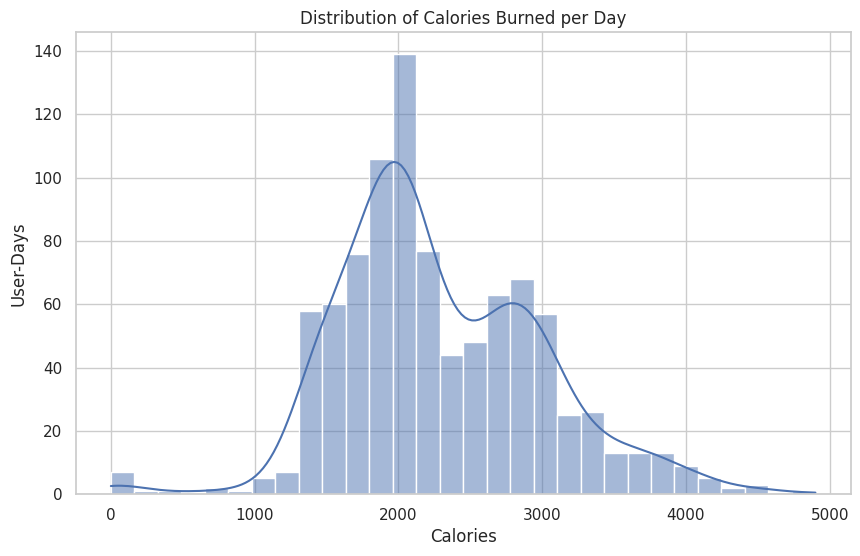

In [ ]:
# Calories Distribution
if 'Calories' in activity.columns:
    plt.figure()
    sns.histplot(activity['Calories'], bins=30, kde=True)
    plt.title('Distribution of Calories Burned per Day')
    plt.xlabel('Calories')
    plt.ylabel('User-Days')
    plt.show()

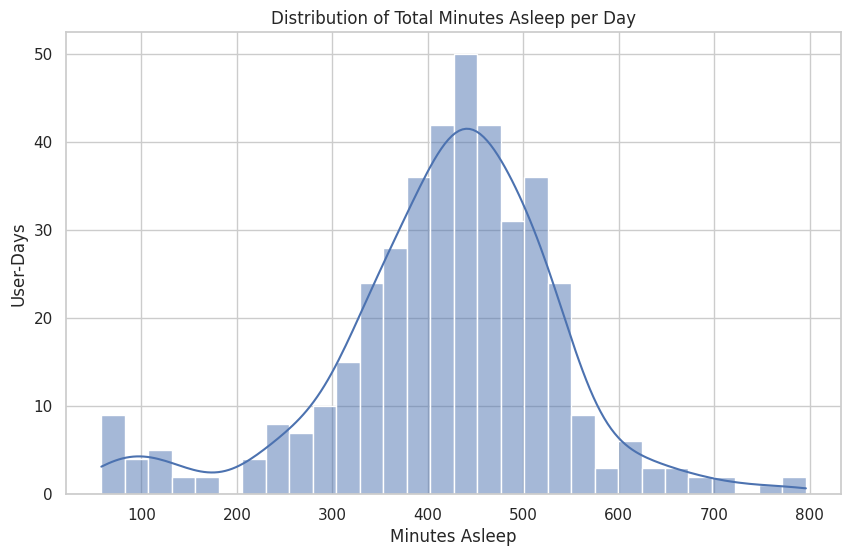

In [ ]:
# Sleep Distribution
if 'TotalMinutesAsleep' in sleep.columns:
    plt.figure()
    sns.histplot(sleep['TotalMinutesAsleep'], bins=30, kde=True)
    plt.title('Distribution of Total Minutes Asleep per Day')
    plt.xlabel('Minutes Asleep')
    plt.ylabel('User-Days')
    plt.show()

### Activity Trends Over Time

We analyze how users’ activity, calories, and sleep patterns change over days and weeks. This helps identify trends, seasonality, or behavioral shifts.

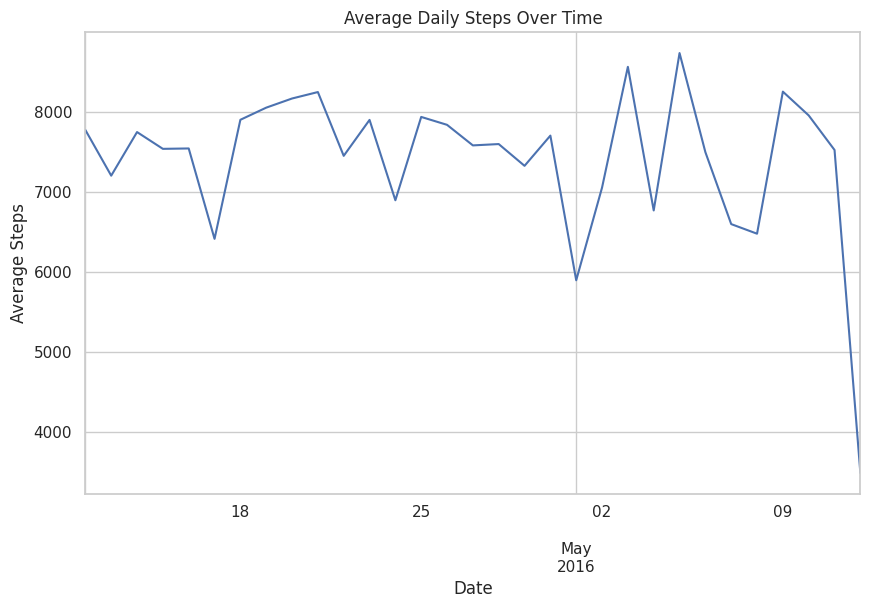

In [ ]:
# Daily Activity Trends (if 'ActivityDate' is available)
if 'ActivityDate' in activity.columns and 'TotalSteps' in activity.columns:
    daily_steps = activity.groupby('ActivityDate')['TotalSteps'].mean()
    plt.figure()
    daily_steps.plot()
    plt.title('Average Daily Steps Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Steps')
    plt.show()

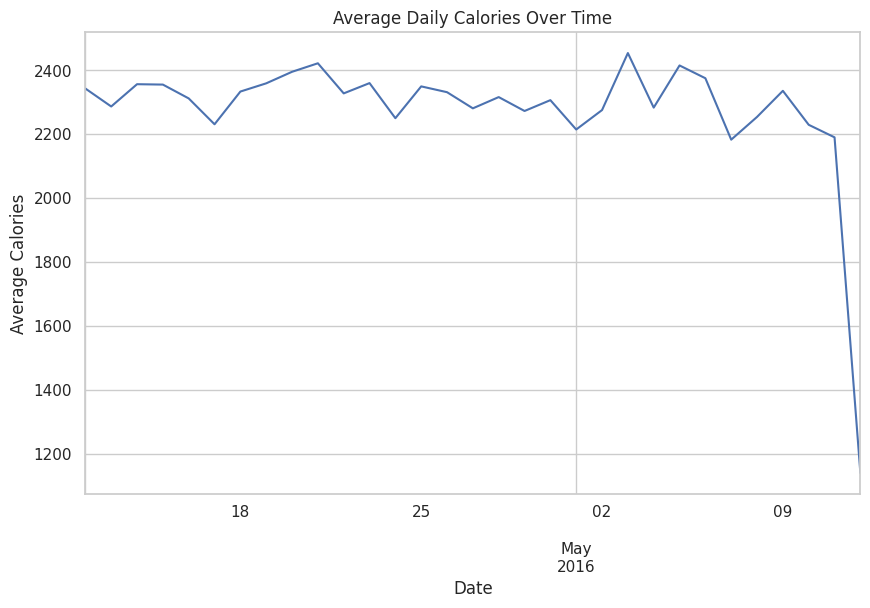

In [ ]:
# Calories
if 'ActivityDate' in activity.columns and 'Calories' in activity.columns:
    daily_calories = activity.groupby('ActivityDate')['Calories'].mean()
    plt.figure()
    daily_calories.plot()
    plt.title('Average Daily Calories Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Calories')
    plt.show()

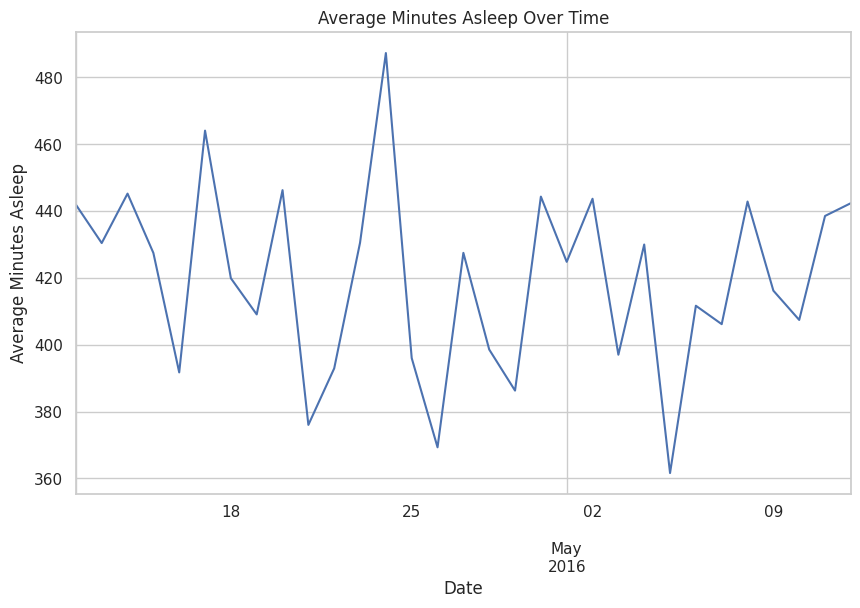

In [24]:
# Sleep
if 'SleepDay' in sleep.columns and 'TotalMinutesAsleep' in sleep.columns:
    daily_sleep = sleep.groupby('SleepDay')['TotalMinutesAsleep'].mean()
    plt.figure()
    daily_sleep.plot()
    plt.title('Average Minutes Asleep Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Minutes Asleep')
    plt.show()

### Activity by Day of Week

Do users tend to be more active on certain days? We compare average steps and activity by weekday.

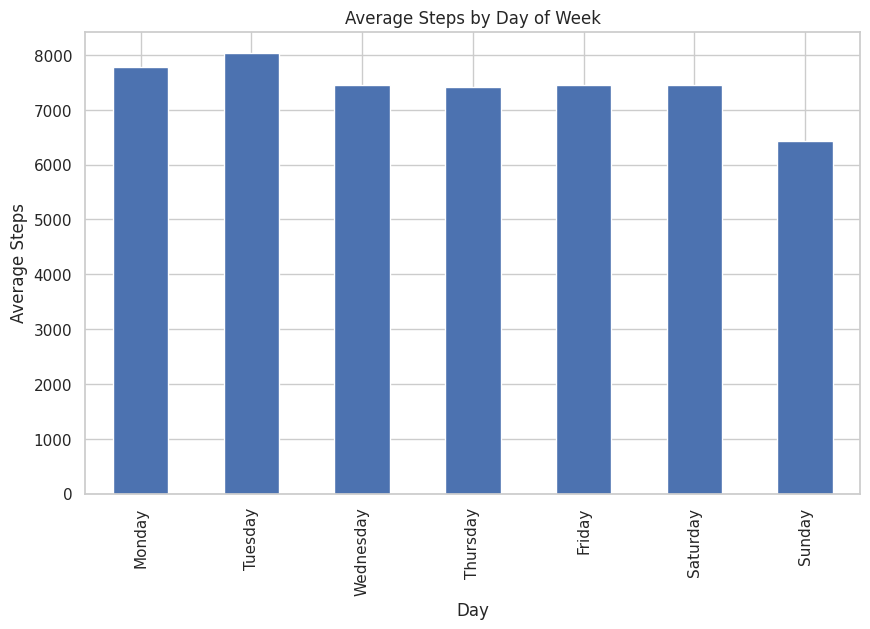

In [26]:
# Activity by day of week
if 'ActivityDate' in activity.columns and 'TotalSteps' in activity.columns:
    activity['DayOfWeek'] = activity['ActivityDate'].dt.day_name()
    steps_by_day = activity.groupby('DayOfWeek')['TotalSteps'].mean().reindex(
        ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    )
    plt.figure()
    steps_by_day.plot(kind='bar')
    plt.title('Average Steps by Day of Week')
    plt.xlabel('Day')
    plt.ylabel('Average Steps')
    plt.show()

### Correlation Between Key Metrics

Understanding the relationships between activity, sleep, and calories can guide feature engineering and user segmentation.

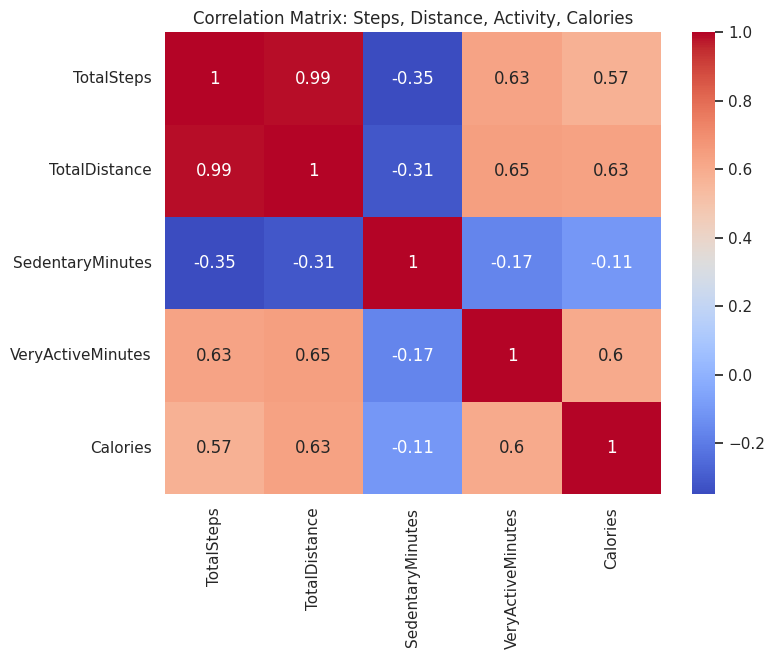

In [27]:
# Correlation heatmap for daily activity metrics
cols = ['TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'VeryActiveMinutes', 'Calories']
corr_data = activity[cols].dropna()
plt.figure(figsize=(8,6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Steps, Distance, Activity, Calories')
plt.show()

### Hourly Activity Patterns

To discover when users are most active, we analyze steps taken each hour across all users. This highlights daily rhythms and can help Strava target notifications or features at optimal times.


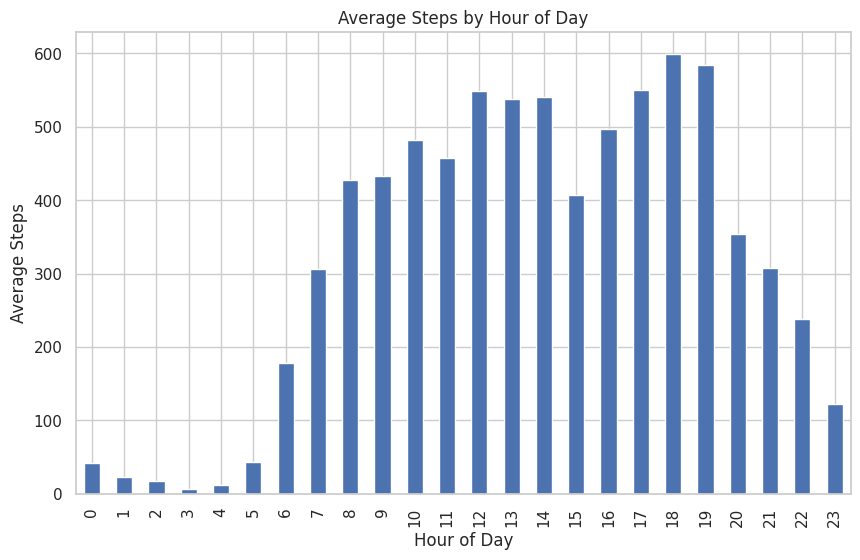

In [28]:
# Ensure datetime is ready
if 'ActivityHour' in hourly_steps.columns:
    hourly_steps['Hour'] = hourly_steps['ActivityHour'].dt.hour

    # Average steps per hour across all days/users
    hourly_profile = hourly_steps.groupby('Hour')['StepTotal'].mean()

    plt.figure()
    hourly_profile.plot(kind='bar')
    plt.title('Average Steps by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Steps')
    plt.xticks(range(0, 24))
    plt.show()

### User Segmentation: Activity Levels

We classify users by their average daily steps, revealing segments like 'sedentary', 'lightly active', and 'highly active' users. This helps Strava tailor challenges and communications.

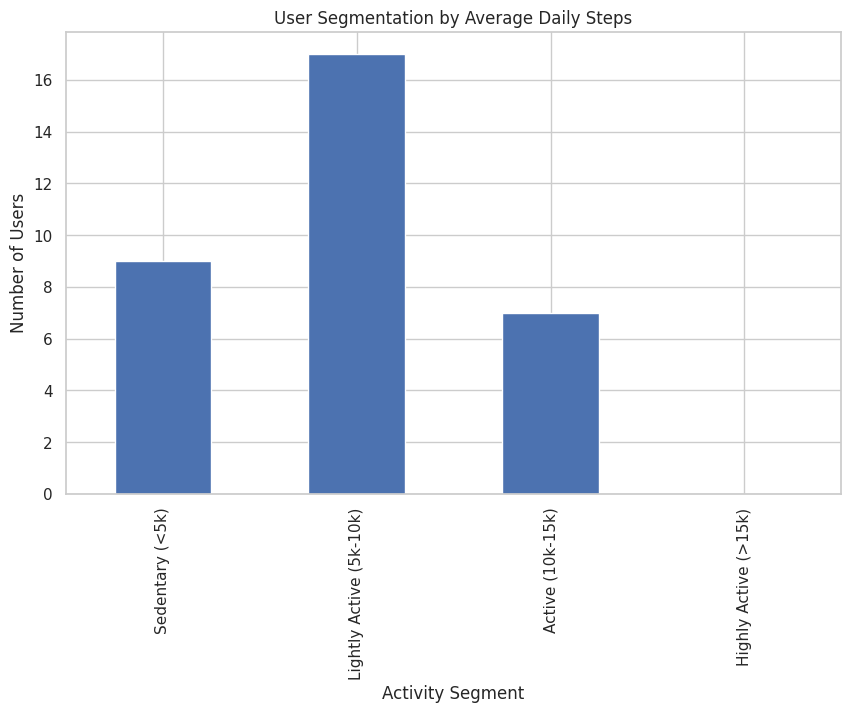

Segment breakdown:
 TotalSteps
Sedentary (<5k)             9
Lightly Active (5k-10k)    17
Active (10k-15k)            7
Highly Active (>15k)        0
Name: count, dtype: int64


In [29]:
# Average daily steps per user
if 'Id' in activity.columns and 'TotalSteps' in activity.columns:
    user_steps = activity.groupby('Id')['TotalSteps'].mean()

    # Define segments (broad example)
    bins = [0, 5000, 10000, 15000, np.inf]
    labels = ['Sedentary (<5k)', 'Lightly Active (5k-10k)', 'Active (10k-15k)', 'Highly Active (>15k)']
    user_segments = pd.cut(user_steps, bins=bins, labels=labels)

    segment_counts = user_segments.value_counts().sort_index()
    plt.figure()
    segment_counts.plot(kind='bar')
    plt.title('User Segmentation by Average Daily Steps')
    plt.ylabel('Number of Users')
    plt.xlabel('Activity Segment')
    plt.show()

    print("Segment breakdown:\n", segment_counts)

### User Engagement and Retention (Repeat Activity)

We look at how many distinct days each user recorded activity to gauge engagement and retention.

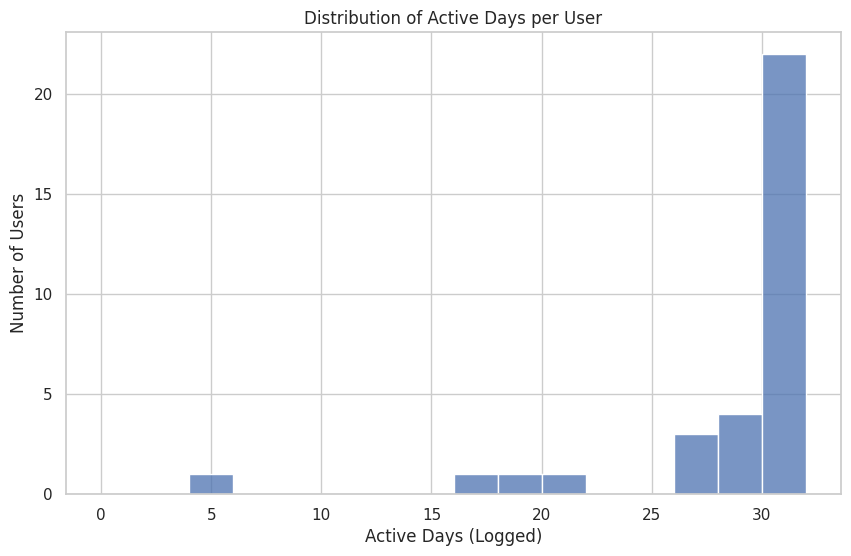

Median active days per user: 31.0
Users active >20 days: 29


In [30]:
# Count active days per user
if 'Id' in activity.columns and 'ActivityDate' in activity.columns:
    user_active_days = activity.groupby('Id')['ActivityDate'].nunique()
    plt.figure()
    sns.histplot(user_active_days, bins=range(0, user_active_days.max()+2, 2), kde=False)
    plt.title('Distribution of Active Days per User')
    plt.xlabel('Active Days (Logged)')
    plt.ylabel('Number of Users')
    plt.show()

    print("Median active days per user:", user_active_days.median())
    print("Users active >20 days:", (user_active_days > 20).sum())

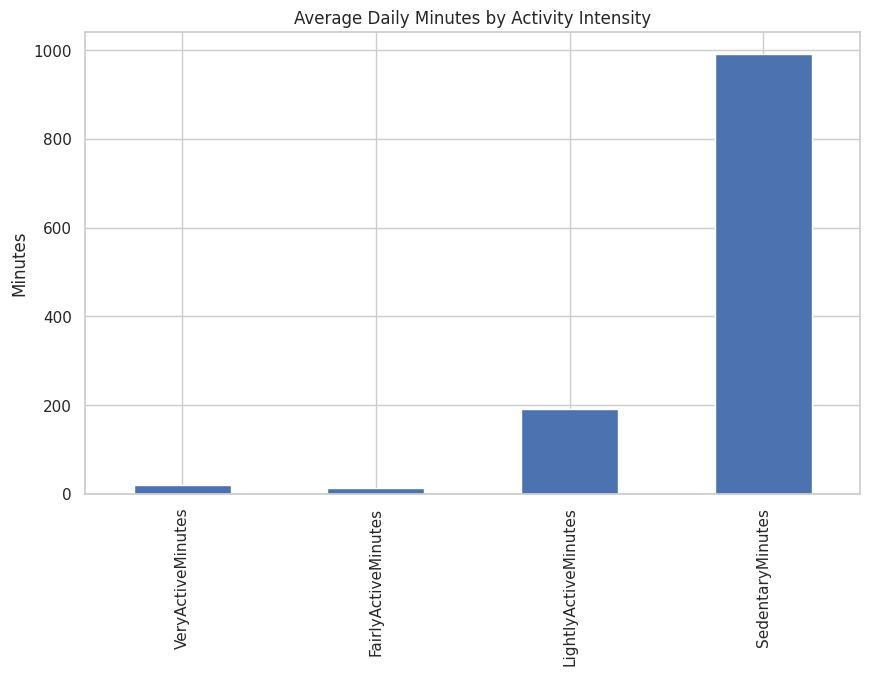

In [31]:
# Plot average intensity minutes per category (daily)
intensity_cols = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']
if all(col in activity.columns for col in intensity_cols):
    mean_intensity = activity[intensity_cols].mean()
    mean_intensity.plot(kind='bar')
    plt.title('Average Daily Minutes by Activity Intensity')
    plt.ylabel('Minutes')
    plt.show()

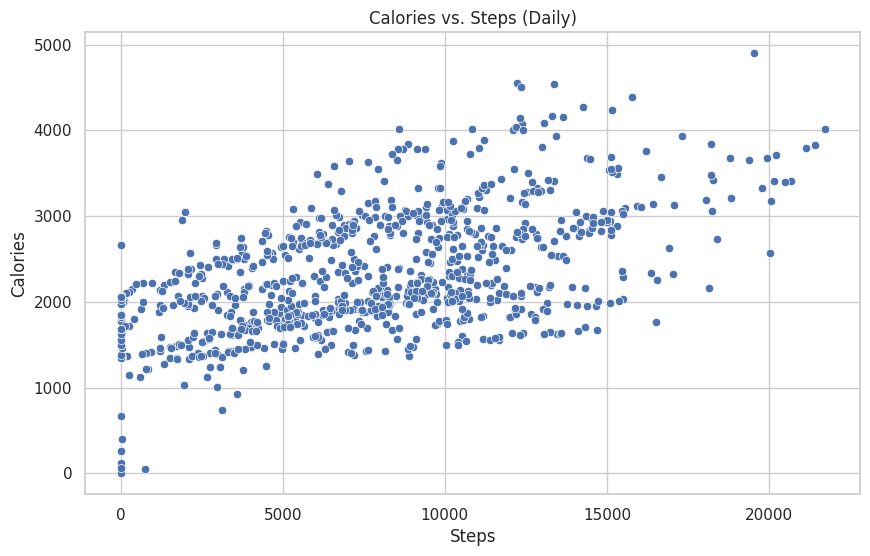

In [32]:
# Scatterplot: Steps vs Calories
if 'TotalSteps' in activity.columns and 'Calories' in activity.columns:
    sns.scatterplot(x='TotalSteps', y='Calories', data=activity)
    plt.title('Calories vs. Steps (Daily)')
    plt.xlabel('Steps')
    plt.ylabel('Calories')
    plt.show()

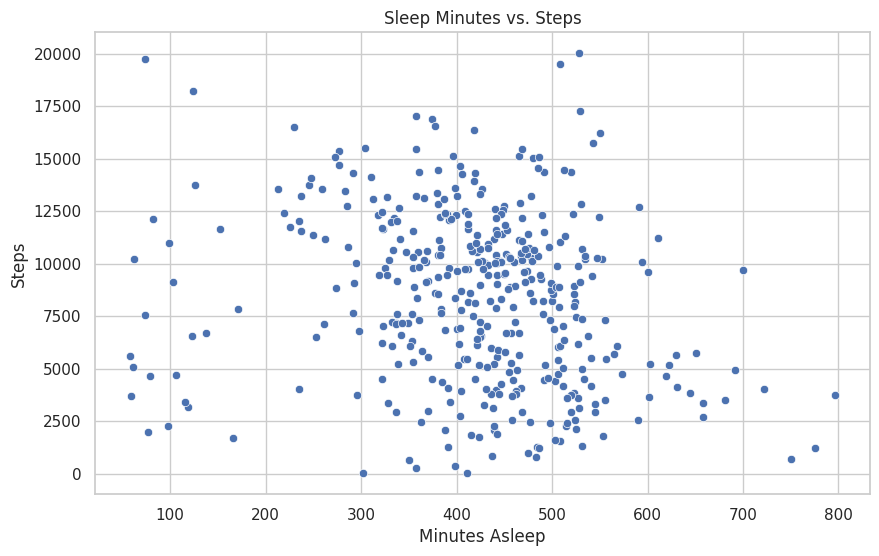

Correlation between sleep and steps:                     TotalMinutesAsleep  TotalSteps
TotalMinutesAsleep            1.000000   -0.193701
TotalSteps                   -0.193701    1.000000


In [33]:
# Merge sleep and steps data by user & date
if 'Id' in sleep.columns and 'SleepDay' in sleep.columns and 'Id' in activity.columns and 'ActivityDate' in activity.columns:
    sleep_agg = sleep.groupby(['Id', 'SleepDay'])['TotalMinutesAsleep'].sum().reset_index()
    act_agg = activity.groupby(['Id', 'ActivityDate'])['TotalSteps'].sum().reset_index()
    merged = pd.merge(
        sleep_agg,
        act_agg,
        left_on=['Id', 'SleepDay'],
        right_on=['Id', 'ActivityDate'],
        how='inner'
    )
    plt.figure()
    sns.scatterplot(x='TotalMinutesAsleep', y='TotalSteps', data=merged)
    plt.title('Sleep Minutes vs. Steps')
    plt.xlabel('Minutes Asleep')
    plt.ylabel('Steps')
    plt.show()
    print("Correlation between sleep and steps:", merged[['TotalMinutesAsleep', 'TotalSteps']].corr())